In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Kalman Preprocessing

In [2]:
def kalman_filter(dataset, init_val = None, init_sd = 0.5, measure_sd = 0.1315, Q = 0.01):
  if init_val == None:
    init_val = dataset[0]
  x = init_val
  p = init_sd + Q
  m_sd = measure_sd
  
  arr_x = np.array([])
  arr_p = np.array([])
  arr_K = np.array([])

  for i in range(len(dataset)):
    K_gain = p / (p + m_sd)
    x = x + K_gain * (dataset[i] - x)
    p = ((1 - K_gain) * p) + Q

    arr_x = np.append(arr_x, x)
    arr_p = np.append(arr_p, p)
    arr_K = np.append(arr_K, K_gain)
  
  return arr_x, arr_p, arr_K

In [3]:
naik_tangga = pd.read_csv('naik_tangga22mei.csv')
sudut_naik_tangga = naik_tangga.iloc[:, 1:].values

turun_tangga = pd.read_csv('turun_tangga22mei.csv')
sudut_turun_tangga = turun_tangga.iloc[:, 1:].values

In [127]:
kalman_naik_tangga, _, _ = kalman_filter(sudut_naik_tangga, init_val = None, init_sd = 0.5, measure_sd = 0.1315, Q = 0.01)
kalman_turun_tangga, _, _ = kalman_filter(sudut_turun_tangga, init_val = None, init_sd = 0.5, measure_sd = 0.1315, Q = 0.01)

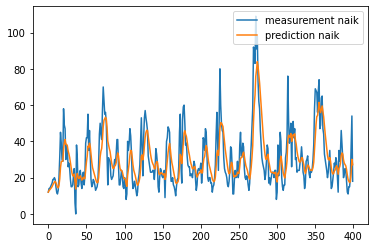

In [36]:
plt.plot(sudut_naik_tangga[:400], label = "measurement naik")
plt.plot(kalman_naik_tangga[:400], label = "prediction naik")
plt.legend(loc='upper right')
plt.show()

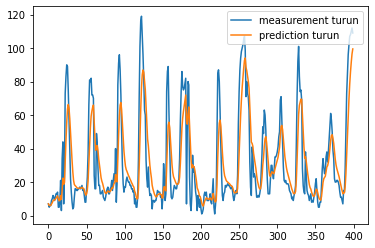

In [37]:
plt.plot(sudut_turun_tangga[:400], label = "measurement turun")
plt.plot(kalman_turun_tangga[:400], label = "prediction turun")
plt.legend(loc='upper right')
plt.show()

In [128]:
kalman_naik_tangga.shape

(2949,)

In [178]:
y_test

array([ 31.43305847,  27.48337469,  24.48299697,  22.20375969,
        20.47233685,  19.39741118,  18.100144  ,  15.67257551,
        13.82847284,  13.1486497 ,  11.91117232,  11.69217215,
        13.20825788,  20.3686998 ,  28.45197908,  30.98719474,
        38.92181883,  47.83355556,  53.40160792,  54.74718083,
        54.567596  ,  53.95047459,  47.47293101,  43.27331397,
        39.60237465,  36.33304541,  32.88809953,  28.10799701,
        24.95749138,  22.56420943,  20.26545275,  18.51920199,
        18.15406196,  16.91528374,  15.49354595,  13.21177323,
        11.95912411,  11.48824885,  10.89019851,  11.87798885,
        12.62836388,  13.91943603,  15.14054902,  16.30851752,
        14.79226603,  13.88079531,  11.98664703,  11.26880675,
        11.44454897,  12.77980101,  17.39937371,  27.15772974,
        40.09871343,  50.41003291,  59.68512722,  67.45200332,
        73.11176171,  75.96909847,  74.05372653,  71.87766436,
        68.78251916,  67.63304121,  64.83704104,  59.34

In [129]:
kalman_turun_tangga.shape

(2708,)

# Olah data sensor

In [8]:
import re

In [9]:
def preprocess_signal_fsr(txt_path):
  rows = []
  with open(txt_path) as f:
    lines_naik = f.readlines()
  for line in lines_naik:
    data = re.search(r"(.*) -> A0 (.*) A1 (.*) A2 (.*) A3 (.*) A4 (.*) A5 (.*) ", line)
    rows.append([data.group(1), int(data.group(2)), int(data.group(3)), int(data.group(4)), int(data.group(5)), int(data.group(6)), int(data.group(7))])
  
  return rows

In [130]:
signal_naik_tangga = np.array(preprocess_signal_fsr('test10mei22(naikTangga).txt'))
signal_naik_tangga = signal_naik_tangga[:, 1:]

signal_turun_tangga = np.array(preprocess_signal_fsr('test10mei22(turunTangga).txt'))
signal_turun_tangga = signal_turun_tangga[:, 1:]

In [131]:
signal_naik_tangga = signal_naik_tangga.astype(float)
signal_naik_tangga.shape

(2903, 6)

In [132]:
signal_turun_tangga = signal_turun_tangga.astype(float)
signal_turun_tangga.shape

(2671, 6)

# Combine Data Kalman dengan Sensor 

In [103]:
267 + 2137

2404

In [133]:
# Data Sudut
kalman_naik_tangga = kalman_naik_tangga[:len(signal_naik_tangga)]
y_train = kalman_naik_tangga[:2323]
y_valid = kalman_naik_tangga[2323: 2613]
y_test = kalman_naik_tangga[2613:]

kalman_turun_tangga = kalman_turun_tangga[:len(signal_turun_tangga)]
y_train = np.append(y_train, kalman_turun_tangga[:2137], axis=0)
y_valid = np.append(y_valid, kalman_turun_tangga[2137: 2404], axis=0)
y_test = np.append(y_test, kalman_turun_tangga[2404:], axis=0)

# Data Signal
x_train = signal_naik_tangga[:2323]
x_valid = signal_naik_tangga[2323: 2613]
x_test = signal_naik_tangga[2613:]

x_train = np.append(x_train, signal_turun_tangga[:2137], axis=0)
x_valid = np.append(x_valid, signal_turun_tangga[2137: 2404], axis=0)
x_test = np.append(x_test, signal_turun_tangga[2404:], axis=0)

In [76]:
type(x_train)

numpy.ndarray

In [134]:
print("x_train: {}".format(x_train.shape))
print("x_valid: {}".format(x_valid.shape))
print("x_test: {}".format(x_test.shape))

x_train: (4460, 6)
x_valid: (557, 6)
x_test: (557, 6)


In [135]:
print("y_train: {}".format(y_train.shape))
print("y_valid: {}".format(y_valid.shape))
print("y_test: {}".format(y_test.shape))

y_train: (4460,)
y_valid: (557,)
y_test: (557,)


# ANN

In [152]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 16.7 MB/s 


In [154]:
import tensorflow as tf
import tensorflow_addons as tfa
tf.__version__
tfa.__version__

'0.17.1'

In [155]:
def model_ann(x_train, x_valid, y_train, y_valid):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),
  ])

  model.compile(optimizer = 'adam', loss = 'mae', metrics = [tfa.metrics.RSquare()])

  model.fit(x_train, y_train, epochs = 100, validation_data = (x_valid, y_valid), verbose = 1)

  model.summary()

  return model

In [156]:
model_ann = model_ann(x_train, x_valid, y_train, y_valid)

Epoch 1/100
140/140 [==============================] - 4s 8ms/step - loss: 16.7274 - r_square: -0.3746 - val_loss: 17.0784 - val_r_square: -0.4100
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 15.3480 - r_square: -0.2039 - val_loss: 17.3785 - val_r_square: -0.5493
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 15.4266 - r_square: -0.1939 - val_loss: 17.8269 - val_r_square: -0.6158
Epoch 4/100
140/140 [==============================] - 0s 2ms/step - loss: 14.8444 - r_square: -0.1556 - val_loss: 17.2743 - val_r_square: -0.4869
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 14.7800 - r_square: -0.1238 - val_loss: 16.9514 - val_r_square: -0.3963
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 14.9108 - r_square: -0.1333 - val_loss: 16.7402 - val_r_square: -0.3909
Epoch 7/100
140/140 [==============================] - 0s 3ms/step - loss: 14.8300 - r_square: -0.1316 - val_loss: 16.

# RNN (use LSTM)

In [157]:
x_train_rnn = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_valid_rnn = x_valid.reshape(x_valid.shape[0], 1, x_valid.shape[1])
x_test_rnn = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [160]:
def model_rnn(x_train, x_valid, y_train, y_valid):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mae'])
  model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid), verbose = 1)
  model.summary()
  return model

In [161]:
model_rnn = model_rnn(x_train_rnn, x_valid_rnn, y_train, y_valid)

Epoch 1/20
140/140 [==============================] - 25s 77ms/step - loss: 18.6793 - mae: 18.6793 - val_loss: 14.6512 - val_mae: 14.6512
Epoch 2/20
140/140 [==============================] - 3s 23ms/step - loss: 14.2701 - mae: 14.2701 - val_loss: 14.9436 - val_mae: 14.9436
Epoch 3/20
140/140 [==============================] - 2s 14ms/step - loss: 14.2856 - mae: 14.2856 - val_loss: 14.5746 - val_mae: 14.5746
Epoch 4/20
140/140 [==============================] - 1s 10ms/step - loss: 14.2753 - mae: 14.2753 - val_loss: 15.0299 - val_mae: 15.0299
Epoch 5/20
140/140 [==============================] - 1s 10ms/step - loss: 14.2915 - mae: 14.2915 - val_loss: 14.5539 - val_mae: 14.5539
Epoch 6/20
140/140 [==============================] - 2s 11ms/step - loss: 14.2720 - mae: 14.2720 - val_loss: 14.7657 - val_mae: 14.7657
Epoch 7/20
140/140 [==============================] - 1s 9ms/step - loss: 14.2833 - mae: 14.2833 - val_loss: 14.3912 - val_mae: 14.3912
Epoch 8/20
140/140 [=====================

In [162]:
model_rnn.evaluate(x_test_rnn, y_test)

18/18 [==============================] - 0s 4ms/step - loss: 19.9760 - mae: 19.9760


[19.97599220275879, 19.97599220275879]

In [171]:
y_test.shape

(557,)

In [174]:
y_pred_valid = model_rnn.predict(x_valid_rnn)
y_pred_test = model_rnn.predict(x_test_rnn)

In [175]:
y_pred_valid = y_pred_valid.reshape(557,)
y_pred_test = y_pred_test.reshape(557,)

In [176]:
metric = tfa.metrics.r_square.RSquare()
metric.update_state(y_valid, y_pred_valid)
result = metric.result()
result.numpy()

-0.2738825

In [177]:
metric = tfa.metrics.r_square.RSquare()
metric.update_state(y_test, y_pred_valid)
result = metric.result()
result.numpy()

-0.26267505

# SVR

In [144]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

xs = sc_x.fit_transform(x_train)
y_train_svr = y_train.reshape(-1, 1)
ys = sc_y.fit_transform(y_train_svr)

In [145]:
from sklearn.svm import SVR
bionicleg_svr = SVR(kernel = 'rbf')
bionicleg_svr.fit(xs, ys)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [146]:
bionicleg_svr.score(x_valid, y_valid)

-3.209343797902589